

---


# QuantSpark MLE Assessment - Customer Churn Prediction for B2B SaaS
**Notebook Author - Taritro Ghoshal**

## Task Introduction
In this data-driven project, I aim to address the pressing challenges faced by a B2B SaaS business: **predicting customer churn**. The goal is to develop predictive models that not only forecast churn with high accuracy but also unveil the underlying reasons behind customer attrition. This enables the business to intervene strategically and retain its customer base.

To tackle this multifaceted problem, I've orchestrated a structured approach segmented into 5 distinct Jupyter notebooks. Each notebook is created to address a specific aspect of the churn prediction task, ensuring a modular, organized, and reusable structure for easy understanding and efficient workflow.

The outline and summary of each of the notebooks are:

1. **EDA & Feature Engineering (1_EDA_FeatureEngineering.ipynb)** - Initial data exploration and transformation to prepare a robust dataset for predictive modeling. The preprocessed data is saved for future use.

2. **Modeling & Optimization (2_Modelling_Optimization.ipynb)** - Experimentation and evaluation of various classifiers, including tree-based bagging and boosting models, using stratified k-fold validation and hyperparameter tuning. The best models are saved alongside performance assessment on a holdout set.

3. **Ensemble Techniques (3_Ensembling_Models.ipynb)** - Development of stacked and voting classifiers to combine individual model predictions, enhancing model robustness, reliability and predictive strength. Ensemble models are saved for later analysis.

4. **Deep Learning Exploration (4_NeuralNetworks.ipynb)** - Implementation of a DenseNet neural network in PyTorch, offering a deep learning perspective on churn prediction. The focus is on network design, training, and validation.

5. **Interpretability, Risk Analysis & Validation (5_ModelExplainability_RiskAnalysis.ipynb)** - Interpretation of model predictions using SHAP, exploration of churn risk scores, and a detailed analysis of prediction errors. Calibration curves are employed to assess model reliability.


---



# Notebook 1 - EDA and Feature Engineering

In [78]:
## Install additional libraries for optimization and modelling
!pip install -q category_encoders ppscore

In [83]:
## Import the necessary libraries required for the task

## Data Manipulation and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import category_encoders as ce
import ppscore as pps

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Turning off warnings
import warnings
warnings.simplefilter('ignore')

# Setting a maximum width for columns display in pandas dataframe
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [84]:
## Load Dataset
df = pd.read_csv("/content/drive/MyDrive/quantspark/quantsparkfiles/dataset.csv")

## Initial Exploration and Cleaning

In [85]:
df.head()

,SALESFORCEACCOUNTID,ACCOUNTING_MONTH,RENEWAL_MONTH,CONTRACT_START_DATE,REGION,SECTOR,TENURE_MONTHS,DNB_GLOBAL_SALES_REVENUE,DNB_GLOBAL_EMPLOYEE_COUNT,CONTRACT_LENGTH,ARR,SEATS,COMPETITOR_SEATS,DETECTEDSEATSCOUNT,PRODUCT_ONE,PRODUCT_TWO,PRODUCT_THREE,PRODUCT_FOUR,PRODUCT_FIVE,PRODUCT_SIX,PRODUCT_SEVEN,PRODUCT_EIGHT,PRODUCT_NINE,PRODUCT_TEN,PRODUCT_ELEVEN,PRODUCT_TWELVE,PRODUCT_THIRTEEN,PRODUCT_FOURTEEN,PRODUCT_FIFTEEN,PRODUCT_SIXTEEN,PRODUCT_SEVENTEEN,PRODUCT_EIGHTEEN,PRODUCT_NINETEEN,PRODUCT_TWENTY,PRODUCT_TWENTYONE,PRODUCT_TWENTYTWO,PRODUCT_TWENTYTHREE,LICENSINGSPECIALIST_CHANGE,SALESREP_CHANGE,UPSELLMANAGER_CHANGE,ACCOUNTMANAGER_CHANGE,CHURN_RISK_DISCUSSION,CUSTOMER_HEALTH_CHECK,CS_EVENT_ATTENDED,CROSS_SELL_RECENCY,SEATS_DOWNSELL_RECENCY,PRODUCT_DOWNSELL_RECENCY,SEATS_UPSELL_RECENCY,PCT_PRODUCT_TWO_ENABLED,PCT_PRODUCT_THREE_ENABLED,PCT_PRODUCT_FOUR_ENABLED,PCT_PRODUCT_FIVE_ENABLED,PCT_PRODUCT_SIX_ENABLED,PCT_PRODUCT_NINE_ENABLED,PCT_PRODUCT_TWO_BEST_PRACTICE,PCT_PRODUCT_THREE_BEST_PRACTICE,PCT_PRODUCT_FOUR_BEST_PRACTICE,CUSTOMER_BEHAVIOUR_ONE,CUSTOMER_BEHAVIOUR_TWO,CUSTOMER_BEHAVIOUR_THREE,CUSTOMER_BEHAVIOUR_FOUR,CUSTOMER_BEHAVIOUR_FIVE,CUSTOMER_BEHAVIOUR_SIX,CUSTOMER_BEHAVIOUR_SEVEN,CUSTOMER_BEHAVIOUR_EIGHT,CUSTOMER_BEHAVIOUR_NINE,CUSTOMER_BEHAVIOUR_TEN,CUSTOMER_BEHAVIOUR_ELEVEN,MAX_SUPPORT_CASE_DAYSTOCLOSE,MAX_SUPPORT_CASE_TIMETOFIRSTRESPONSE,AVG_SUPPORT_CASE_PRIORITY_SCORE,SUM_SEVERE_CASES,SUM_HIGH_CASES,SUM_MEDIUM_CASES,SUM_LOW_CASES,SUM_STANDARD_CASES,SUPPORT_CASE_NUMBEROFSLABREACHES,BACKLOG,SURVEY_AVG_CXI_SCORE,SURVEY_AVG_NPS_SCORE,SURVEY_AVG_CASE_MOOD_SCORE,CHURN
0,0011N00001hBZM7QAO,2021-10-01 00:00:00+00:00,2021-12-01T00:00:00Z,2020-12-24T00:00:00Z,UKI,Professional Services,126,NaN,NaN,364,27241.17,330,0,1.015152,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,21,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,NaN,NaN,NaN,0
1,0011N00001hBZM7QAO,2021-11-01 00:00:00+00:00,2021-12-01T00:00:00Z,2020-12-24T00:00:00Z,UKI,Professional Services,127,NaN,NaN,364,27241.17,330,0,1.021212,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,22,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,NaN,NaN,NaN,0
2,0011N00001hBZM7QAO,2021-12-01 00:00:00+00:00,2022-12-01T00:00:00Z,2021-12-24T00:00:00Z,UKI,Professional Services,128,NaN,NaN,364,30349.76,350,0,0.940000,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,NaN,NaN,NaN,0
3,0011N00001hBZM7QAO,2022-01-01 00:00:00+00:00,2022-12-01T00:00:00Z,2021-12-24T00:00:00Z,UKI,Professional Services,129,NaN,NaN,364,30349.76,350,0,0.960000,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,1,0,0,0,0,0,0,0,0,0,0,116598,0,0,0,11525,362,4,14,1892,0,0,0,0.0,0,0,0,0,0,0,1,NaN,NaN,NaN,0
4,0011N00001hBZM7QAO,2022-02-01 00:00:00+00:00,2022-12-01T00:00:00Z,2021-12-24T00:00:00Z,UKI,Professional Services,130,NaN,NaN,364,30349.76,350,0,0.940000,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,40704,0,0,0,3804,194,17,4,737,0,0,0,0.0,0,0,0,0,0,0,1,NaN,NaN,NaN,0


In [86]:
## Exploring the dimensions of the data
print("Shape of data", df.shape)

Shape of data (100000, 82)


## Exploratory Data Analysis
This section is focused on the Exploratory Data Analysis (EDA) part. EDA is crucial before diving into modeling as it provides insights about the data, including distributions, potential outliers, missing values, and other statistical properties.

In [87]:
## Getting info about the columns, data types, and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 82 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SALESFORCEACCOUNTID                   100000 non-null  object 
 1   ACCOUNTING_MONTH                      100000 non-null  object 
 2   RENEWAL_MONTH                         100000 non-null  object 
 3   CONTRACT_START_DATE                   100000 non-null  object 
 4   REGION                                100000 non-null  object 
 5   SECTOR                                100000 non-null  object 
 6   TENURE_MONTHS                         100000 non-null  int64  
 7   DNB_GLOBAL_SALES_REVENUE              61863 non-null   float64
 8   DNB_GLOBAL_EMPLOYEE_COUNT             61863 non-null   float64
 9   CONTRACT_LENGTH                       100000 non-null  int64  
 10  ARR                                   100000 non-null  float64
 11  S

In [88]:
def enhanced_describe(df):
    description = df.describe(include='all').T
    uniques = pd.DataFrame(df.nunique(), columns=['nunique'])
    first_values = pd.DataFrame(df.apply(lambda col: list(col.dropna().unique()[:3])), columns=['first_values'])

    combined_description = pd.concat([description, uniques, first_values], axis=1)
    description_rows = combined_description.transpose()

    return description_rows

## Summary statistics of the dataframe
enhanced_describe(df)

,SALESFORCEACCOUNTID,ACCOUNTING_MONTH,RENEWAL_MONTH,CONTRACT_START_DATE,REGION,SECTOR,TENURE_MONTHS,DNB_GLOBAL_SALES_REVENUE,DNB_GLOBAL_EMPLOYEE_COUNT,CONTRACT_LENGTH,ARR,SEATS,COMPETITOR_SEATS,DETECTEDSEATSCOUNT,PRODUCT_ONE,PRODUCT_TWO,PRODUCT_THREE,PRODUCT_FOUR,PRODUCT_FIVE,PRODUCT_SIX,PRODUCT_SEVEN,PRODUCT_EIGHT,PRODUCT_NINE,PRODUCT_TEN,PRODUCT_ELEVEN,PRODUCT_TWELVE,PRODUCT_THIRTEEN,PRODUCT_FOURTEEN,PRODUCT_FIFTEEN,PRODUCT_SIXTEEN,PRODUCT_SEVENTEEN,PRODUCT_EIGHTEEN,PRODUCT_NINETEEN,PRODUCT_TWENTY,PRODUCT_TWENTYONE,PRODUCT_TWENTYTWO,PRODUCT_TWENTYTHREE,LICENSINGSPECIALIST_CHANGE,SALESREP_CHANGE,UPSELLMANAGER_CHANGE,ACCOUNTMANAGER_CHANGE,CHURN_RISK_DISCUSSION,CUSTOMER_HEALTH_CHECK,CS_EVENT_ATTENDED,CROSS_SELL_RECENCY,SEATS_DOWNSELL_RECENCY,PRODUCT_DOWNSELL_RECENCY,SEATS_UPSELL_RECENCY,PCT_PRODUCT_TWO_ENABLED,PCT_PRODUCT_THREE_ENABLED,PCT_PRODUCT_FOUR_ENABLED,PCT_PRODUCT_FIVE_ENABLED,PCT_PRODUCT_SIX_ENABLED,PCT_PRODUCT_NINE_ENABLED,PCT_PRODUCT_TWO_BEST_PRACTICE,PCT_PRODUCT_THREE_BEST_PRACTICE,PCT_PRODUCT_FOUR_BEST_PRACTICE,CUSTOMER_BEHAVIOUR_ONE,CUSTOMER_BEHAVIOUR_TWO,CUSTOMER_BEHAVIOUR_THREE,CUSTOMER_BEHAVIOUR_FOUR,CUSTOMER_BEHAVIOUR_FIVE,CUSTOMER_BEHAVIOUR_SIX,CUSTOMER_BEHAVIOUR_SEVEN,CUSTOMER_BEHAVIOUR_EIGHT,CUSTOMER_BEHAVIOUR_NINE,CUSTOMER_BEHAVIOUR_TEN,CUSTOMER_BEHAVIOUR_ELEVEN,MAX_SUPPORT_CASE_DAYSTOCLOSE,MAX_SUPPORT_CASE_TIMETOFIRSTRESPONSE,AVG_SUPPORT_CASE_PRIORITY_SCORE,SUM_SEVERE_CASES,SUM_HIGH_CASES,SUM_MEDIUM_CASES,SUM_LOW_CASES,SUM_STANDARD_CASES,SUPPORT_CASE_NUMBEROFSLABREACHES,BACKLOG,SURVEY_AVG_CXI_SCORE,SURVEY_AVG_NPS_SCORE,SURVEY_AVG_CASE_MOOD_SCORE,CHURN
count,100000,100000,100000,100000,100000,100000,100000.0,61863.0,61863.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,1190.0,365.0,2444.0,100000.0
unique,3336,42,90,1538,9,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0011N00001aYYPzQAO,2021-03-01 00:00:00+00:00,2022-03-01T00:00:00Z,2020-03-31T00:00:00Z,USA,Professional Services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,41,2587,4324,1187,42497,19344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,43.06911,3049351173.615958,7569.067698,394.78738,24977.150597,839.21336,79.16575,0.687032,0.87278,0.55401,0.15725,0.51419,0.85334,0.18279,0.00972,0.0092,0.93768,0.29334,0.07853,0.00321,0.02335,0.67397,0.00128,0.02386,0.05424,0.19532,0.15417,0.02956,0.0,0.0,0.00011,0.12765,0.0007,0.08527,0.04647,0.00302,0.01504,0.15131,3.17664,4.12464,1.46625,4.14267,0.00353,0.00112,0.0037,0.01038,0.00684,0.0069,0.32741,0.06478,0.11554,0.01577,39695.51223,4.31537,0.00476,0.00044,1526.06354,887.87669,5.76274,29.24501,124.81959,3.23697,3.33596,230.78403,11.480216,0.0002

Check for null-values

In [89]:
df.isnull().sum()[df.isnull().sum() > 0]

DNB_GLOBAL_SALES_REVENUE      38137
DNB_GLOBAL_EMPLOYEE_COUNT     38137
SURVEY_AVG_CXI_SCORE          98810
SURVEY_AVG_NPS_SCORE          99635
SURVEY_AVG_CASE_MOOD_SCORE    97556
dtype: int64

We can see the the below columns contains a large number of null-values. We have to treat them accordingly

Checking for any duplicate records :-

In [90]:
df[df.duplicated(keep=False)]

,SALESFORCEACCOUNTID,ACCOUNTING_MONTH,RENEWAL_MONTH,CONTRACT_START_DATE,REGION,SECTOR,TENURE_MONTHS,DNB_GLOBAL_SALES_REVENUE,DNB_GLOBAL_EMPLOYEE_COUNT,CONTRACT_LENGTH,ARR,SEATS,COMPETITOR_SEATS,DETECTEDSEATSCOUNT,PRODUCT_ONE,PRODUCT_TWO,PRODUCT_THREE,PRODUCT_FOUR,PRODUCT_FIVE,PRODUCT_SIX,PRODUCT_SEVEN,PRODUCT_EIGHT,PRODUCT_NINE,PRODUCT_TEN,PRODUCT_ELEVEN,PRODUCT_TWELVE,PRODUCT_THIRTEEN,PRODUCT_FOURTEEN,PRODUCT_FIFTEEN,PRODUCT_SIXTEEN,PRODUCT_SEVENTEEN,PRODUCT_EIGHTEEN,PRODUCT_NINETEEN,PRODUCT_TWENTY,PRODUCT_TWENTYONE,PRODUCT_TWENTYTWO,PRODUCT_TWENTYTHREE,LICENSINGSPECIALIST_CHANGE,SALESREP_CHANGE,UPSELLMANAGER_CHANGE,ACCOUNTMANAGER_CHANGE,CHURN_RISK_DISCUSSION,CUSTOMER_HEALTH_CHECK,CS_EVENT_ATTENDED,CROSS_SELL_RECENCY,SEATS_DOWNSELL_RECENCY,PRODUCT_DOWNSELL_RECENCY,SEATS_UPSELL_RECENCY,PCT_PRODUCT_TWO_ENABLED,PCT_PRODUCT_THREE_ENABLED,PCT_PRODUCT_FOUR_ENABLED,PCT_PRODUCT_FIVE_ENABLED,PCT_PRODUCT_SIX_ENABLED,PCT_PRODUCT_NINE_ENABLED,PCT_PRODUCT_TWO_BEST_PRACTICE,PCT_PRODUCT_THREE_BEST_PRACTICE,PCT_PRODUCT_FOUR_BEST_PRACTICE,CUSTOMER_BEHAVIOUR_ONE,CUSTOMER_BEHAVIOUR_TWO,CUSTOMER_BEHAVIOUR_THREE,CUSTOMER_BEHAVIOUR_FOUR,CUSTOMER_BEHAVIOUR_FIVE,CUSTOMER_BEHAVIOUR_SIX,CUSTOMER_BEHAVIOUR_SEVEN,CUSTOMER_BEHAVIOUR_EIGHT,CUSTOMER_BEHAVIOUR_NINE,CUSTOMER_BEHAVIOUR_TEN,CUSTOMER_BEHAVIOUR_ELEVEN,MAX_SUPPORT_CASE_DAYSTOCLOSE,MAX_SUPPORT_CASE_TIMETOFIRSTRESPONSE,AVG_SUPPORT_CASE_PRIORITY_SCORE,SUM_SEVERE_CASES,SUM_HIGH_CASES,SUM_MEDIUM_CASES,SUM_LOW_CASES,SUM_STANDARD_CASES,SUPPORT_CASE_NUMBEROFSLABREACHES,BACKLOG,SURVEY_AVG_CXI_SCORE,SURVEY_AVG_NPS_SCORE,SURVEY_AVG_CASE_MOOD_SCORE,CHURN


There are no duplicate records present

### Target Variable EDA

In [91]:
target_col = "CHURN"
df[target_col].value_counts()

0    99330
1    670  
Name: CHURN, dtype: int64

0    99330
1    670  
Name: CHURN, dtype: int64


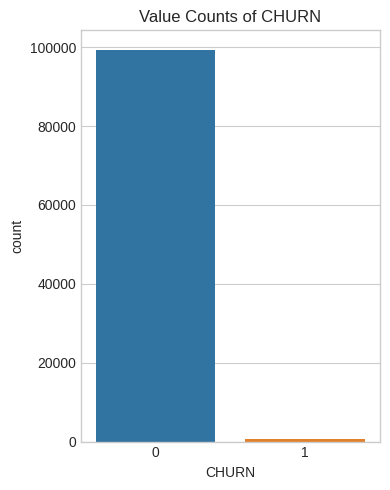

In [92]:
fig, ax = plt.subplots(figsize=(4, 5))

# Count plot for the target variable
sns.countplot(data=df, x=target_col, ax=ax, fill=True)
ax.set_title(f'Value Counts of {target_col}')
print(df[target_col].value_counts())
plt.tight_layout()
plt.show()

As we can infer from the above graph for the target variable distribution:
- There is a significant imbalance between the two categories of the churn variable.
- The number of customers who have not churned (99330) is substantially higher than the number of customers who have churned (670)
- The non-churning customers make up the vast majority of the data, which suggests that within this dataset, customer retention is high, however there is still room for improvement in customer retention strategies


In [93]:
df["SALESFORCEACCOUNTID"].nunique()

3336

There are total 3336 unique customers

### Time Series Analysis

In [94]:
datetime_cols = ["ACCOUNTING_MONTH", "RENEWAL_MONTH","CONTRACT_START_DATE"]
df[datetime_cols] = df[datetime_cols].apply(pd.to_datetime)

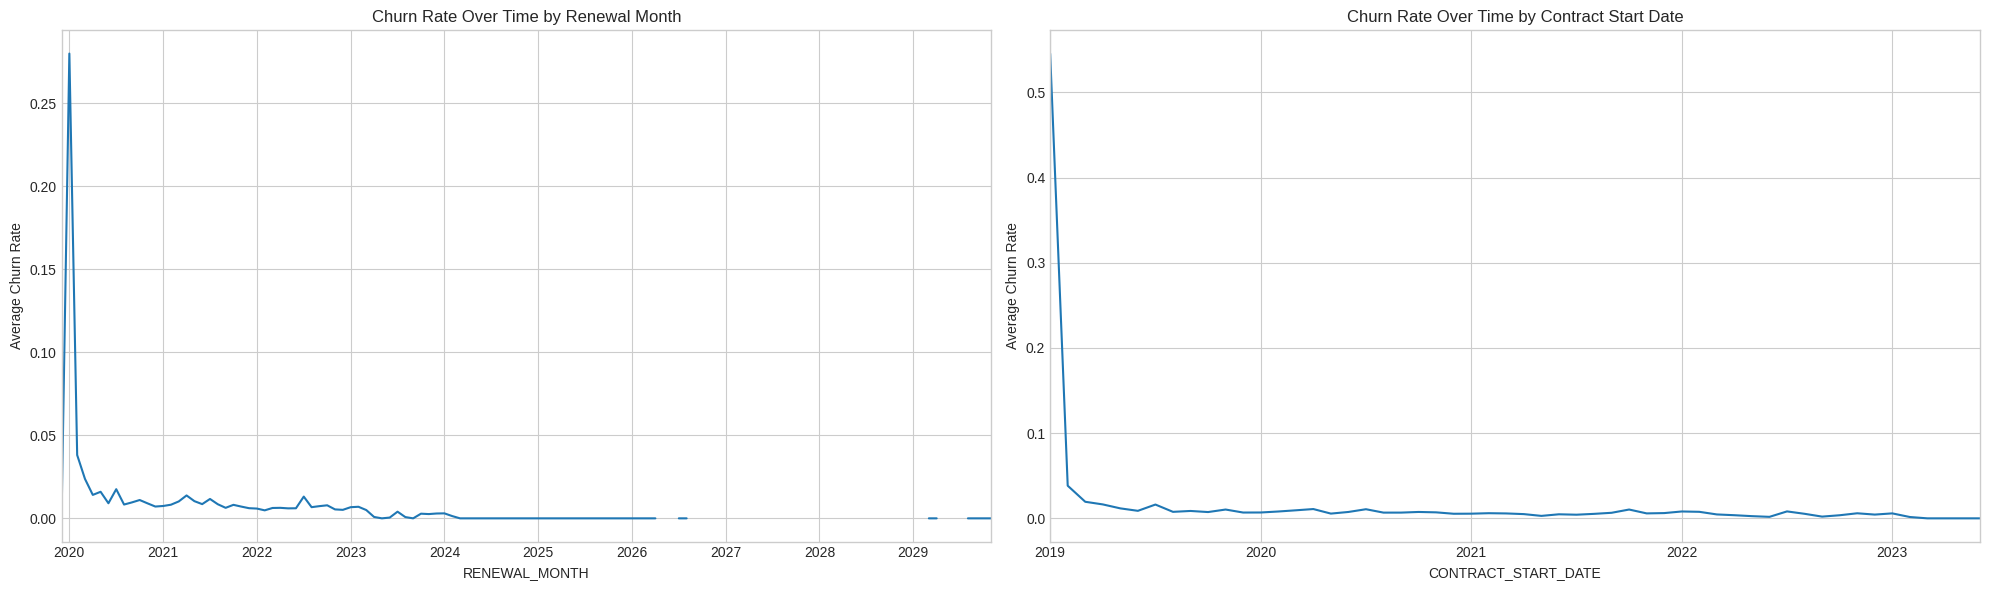

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# First subplot for 'RENEWAL_MONTH'.
df.set_index('RENEWAL_MONTH')['CHURN'].resample('M').mean().plot(ax=ax[0])
ax[0].set_title('Churn Rate Over Time by Renewal Month')
ax[0].set_ylabel('Average Churn Rate')
ax[0].set_xlabel('RENEWAL_MONTH')

# Second subplot for 'CONTRACT_START_DATE'.
df.set_index('CONTRACT_START_DATE')['CHURN'].resample('M').mean().plot(ax=ax[1])
ax[1].set_title('Churn Rate Over Time by Contract Start Date')
ax[1].set_ylabel('Average Churn Rate')
ax[1].set_xlabel('CONTRACT_START_DATE')

plt.tight_layout()
plt.show()

We can infer from the above graph that there is a high churn rate for customers having their renewal month in around 2020 and contract start date around 2019.
- This initial spike could mean a lot of low commitment customers churned in the initial phases of the company but eventually the churn stabilized indicating effective retention strategies implemented by the company
- There could have been initial issues with customer satisfaction or product-market fit, which were resolved, leading to better retention over time

In [96]:
df["ACCOUNTING_MONTH"].dt.day.nunique()

1

In [97]:
df["RENEWAL_MONTH"].dt.day.nunique()

1

In [98]:
df["CONTRACT_START_DATE"].dt.day.nunique()

31

Since the day for ACCOUNTING_MONTH and RENEWAL_MONTH is unique, I will only extract the month and year as features

#### Time Series Feature Engineering

In [99]:
df["ACCOUNTING_MONTH_Month"] = df["ACCOUNTING_MONTH"].dt.month
df["ACCOUNTING_MONTH_Year"] = df["ACCOUNTING_MONTH"].dt.year

df["RENEWAL_MONTH_Month"] = df["RENEWAL_MONTH"].dt.month
df["RENEWAL_MONTHYear"] = df["RENEWAL_MONTH"].dt.year

df["CONTRACT_START_DATE_Day"] = df["CONTRACT_START_DATE"].dt.day
df["CONTRACT_START_DATE_Month"] = df["CONTRACT_START_DATE"].dt.month
df["CONTRACT_START_DATE_Year"] = df["CONTRACT_START_DATE"].dt.year

monthly_revenue_stats = df.groupby(['ACCOUNTING_MONTH'])['ARR'].agg(['mean']).reset_index()
df = df.merge(monthly_revenue_stats, on='ACCOUNTING_MONTH', how='left')

df = df.drop(datetime_cols, axis=1)

#### Feature Segregation

In [100]:
num_cols = [col for col in df.columns if df[col].nunique() > 20 and df[col].dtypes in ['int64','float64']]
cat_cols = [col for col in df.columns if col not in num_cols]
identifier_col = ['SALESFORCEACCOUNTID']
profile_cols = ['REGION','SECTOR','TENURE_MONTHS','DNB_GLOBAL_SALES_REVENUE','DNB_GLOBAL_EMPLOYEE_COUNT','CONTRACT_LENGTH']
customer_size_cols = ['ARR','SEATS','COMPETITOR_SEATS']
customer_product_cols = ['PRODUCT_']
service_account_mgmt_cols = ['LICENSINGSPECIALIST_CHANGE','SALESREP_CHANGE','UPSELLMANAGER_CHANGE','ACCOUNTMANAGER_CHANGE']
events_engagements_cols = ['CHURN_RISK_DISCUSSION','CUSTOMER_HEALTH_CHECK','CS_EVENT_ATTENDED']
account_movements_cols = ['CROSS_SELL_RECENCY','SEATS_DOWNSELL_RECENCY','PRODUCT_DOWNSELL_RECENCY','SEATS_UPSELL_RECENCY']
product_usage_cols = ['DETECTEDSEATSCOUNT','CUSTOMER_BEHAVIOUR_']
product_config_cols = ['PCT_PRODUCT_TWO_ENABLED', 'PCT_PRODUCT_THREE_ENABLED',
                       'PCT_PRODUCT_FOUR_ENABLED',
                       'PCT_PRODUCT_FIVE_ENABLED',
                       'PCT_PRODUCT_SIX_ENABLED',
                       'PCT_PRODUCT_NINE_ENABLED',
                       'PCT_PRODUCT_TWO_BEST_PRACTICE',
                       'PCT_PRODUCT_THREE_BEST_PRACTICE',
                       'PCT_PRODUCT_FOUR_BEST_PRACTICE']
support_cases_cols = ['MAX_SUPPORT_CASE_DAYSTOCLOSE','MAX_SUPPORT_CASE_TIMETOFIRSTRESPONSE','AVG_SUPPORT_CASE_PRIORITY_SCORE','SUM_SEVERE_CASES',
                      'SUM_HIGH_CASES','SUM_MEDIUM_CASES','SUM_LOW_CASES','SUM_STANDARD_CASES','SUPPORT_CASE_NUMBEROFSLABREACHES','BACKLOG']
survey_cols = ['SURVEY_AVG_CXI_SCORE','SURVEY_AVG_NPS_SCORE','SURVEY_AVG_CASE_MOOD_SCORE']

### Univariate Analysis
Univariate analysis is performed to understand the distribution of individual columns.

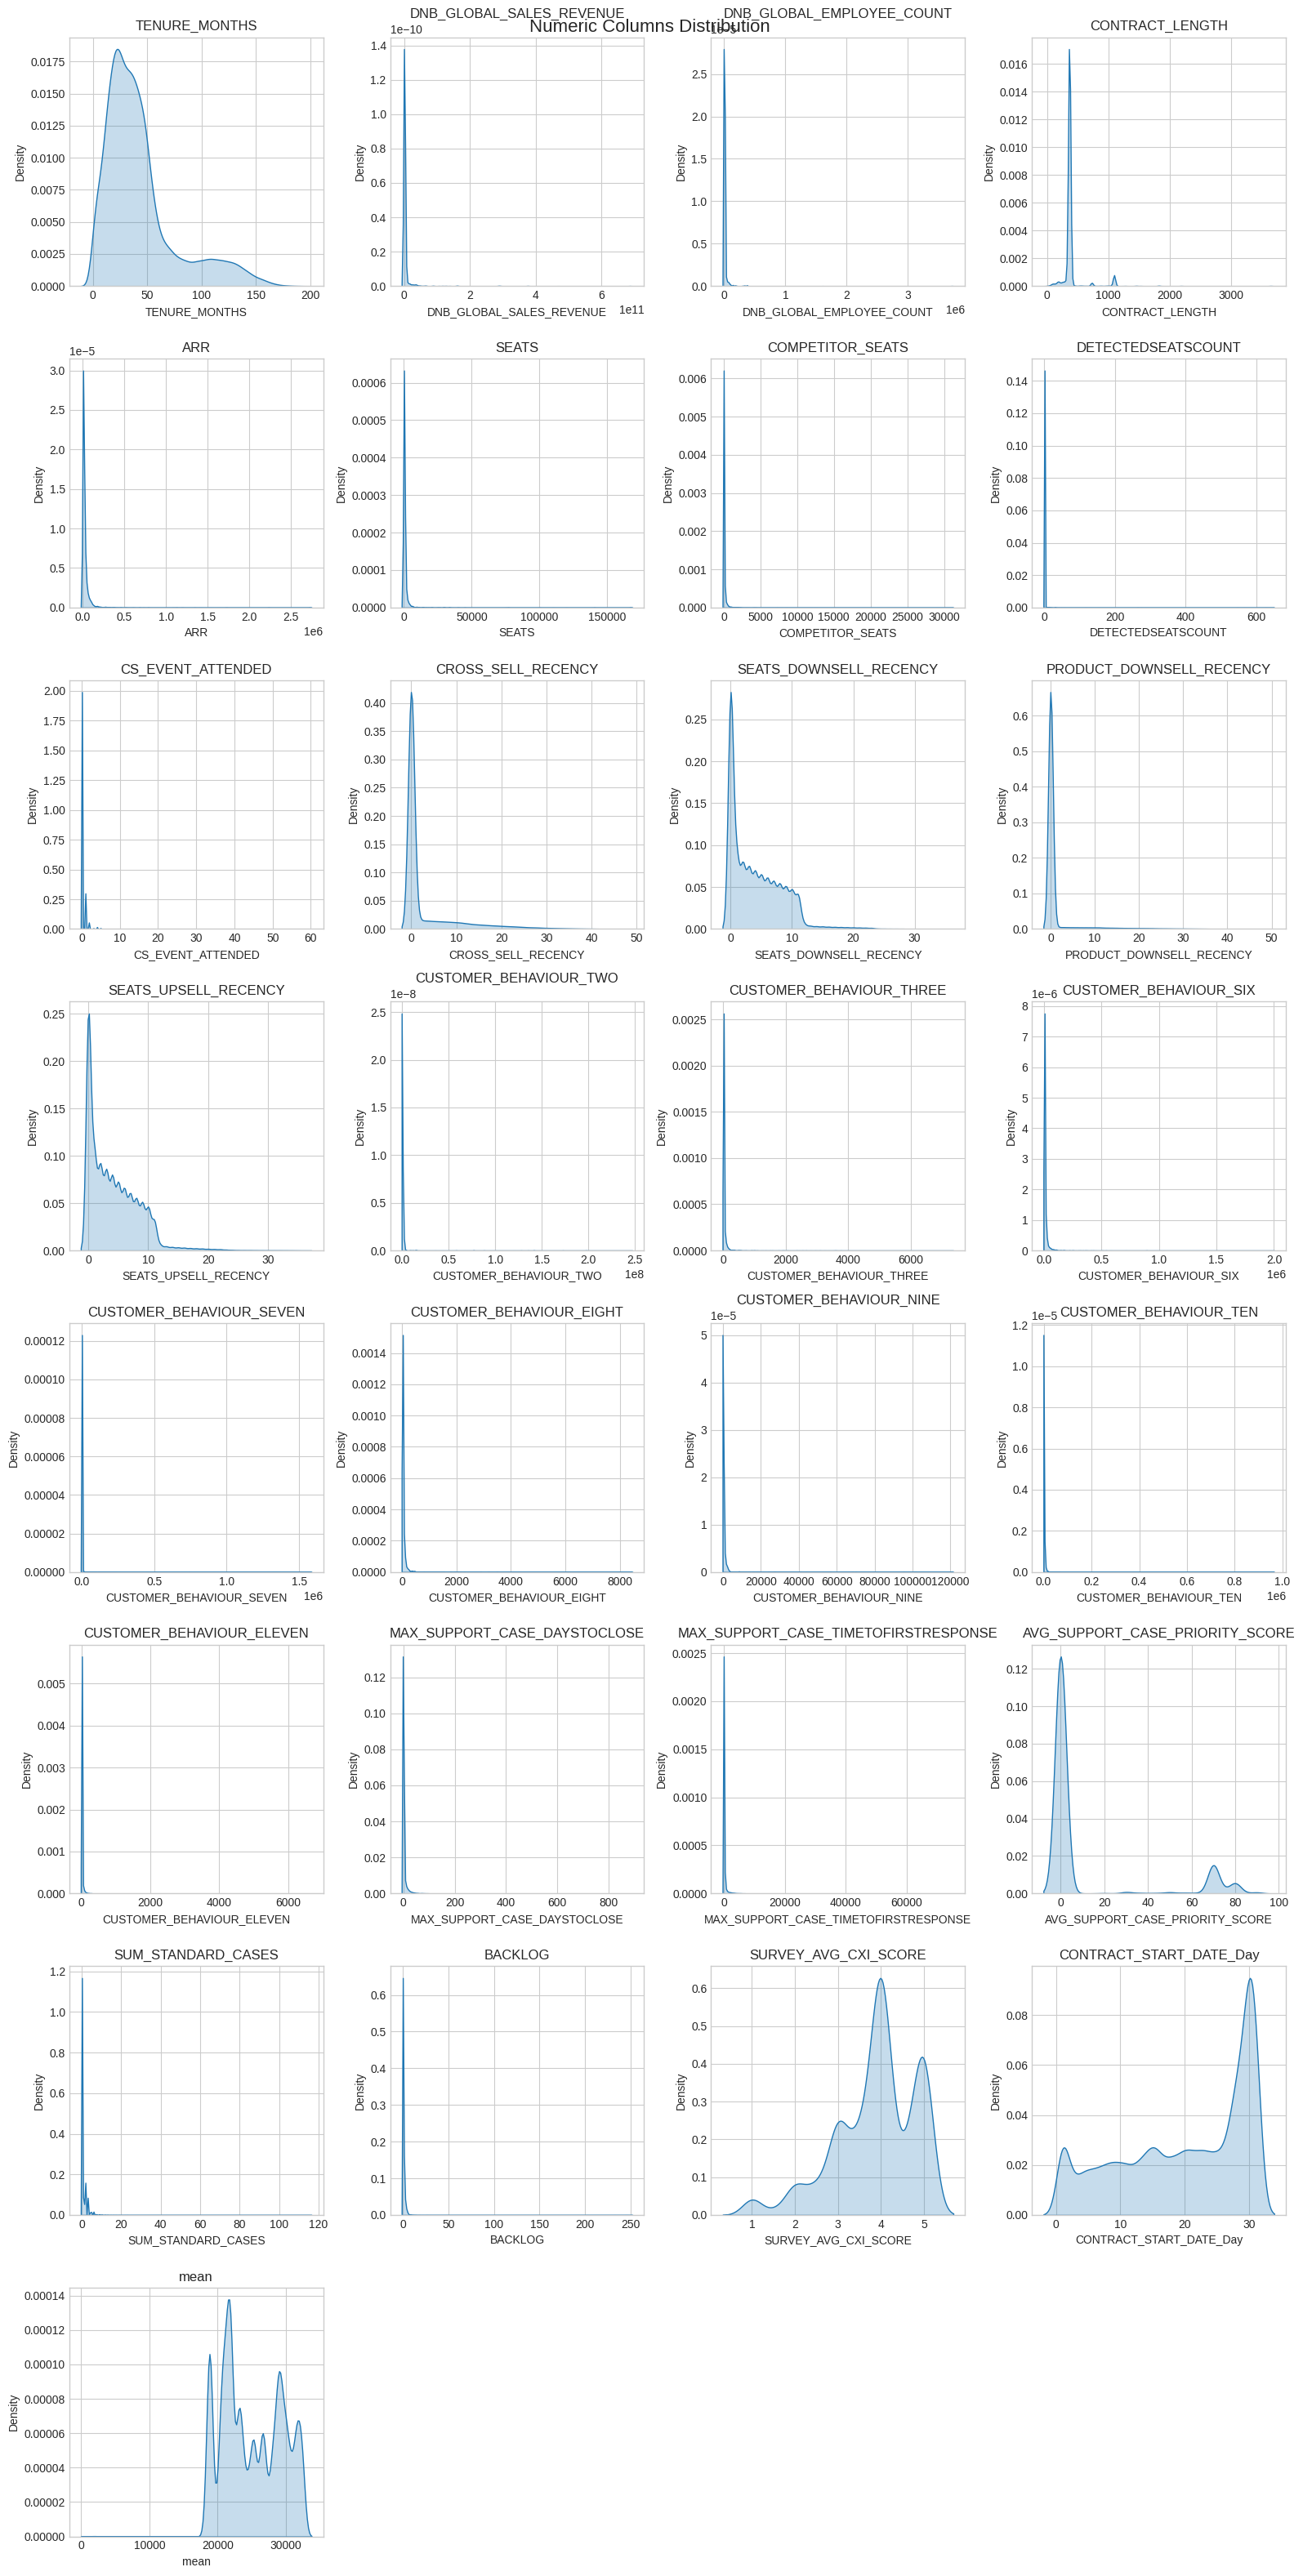

In [101]:
## Plotting KDE plots for individual columns distribution
def plot_kdeplots(data, cols, title, n_cols=4):
    n_rows = int(len(cols) / n_cols) + (len(cols) % n_cols > 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    for ax, col in zip(axes.ravel(), cols):
        sns.kdeplot(data=data, x=col, ax=ax, fill=True)
        ax.set_title(col)

    for ax in axes.ravel()[len(cols):]:
        ax.axis('off')

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_kdeplots(df, num_cols, title="Numeric Columns Distribution")

 - We can see that a lot of the numeric features are right skewed indicating potential outliers e.g. the tenure months data is right skewed indicating more customers have a shorter tenure period for the company products.
 - We can also see that the contract days is peaking at around 300-400 days suggesting most customers opt for around a 1 year contract term.
 - Due to the high dimensionality and complexity of the data, we will primarily be modelling using tree-based algorithms which are generally robust to outliers and skew so no particular treatment is required over here. Tree-based algorithms have also been repeatedly outperforming other algorithms in structured data modelling.
 - Some features, like CUSTOMER_BEHAVIOUR_TEN and CUSTOMER_BEHAVIOUR_ELEVEN, have distributions that are very peaked at low values, suggesting that these features might be sparse for many customers and are rare.

#### Categorical Variable Analysis

In [102]:
def plot_categorical_columns(df, categorical_columns, cols=3, title="Plot", figsize=(8,6)):
    """
    Plots seaborn countplots for given categorical columns in a grid format.

    :param df: pandas DataFrame
    :param categorical_columns: list of strings representing the categorical column names
    :param cols: int, number of columns in the grid
    """

    # Calculate required number of rows for subplots based on number of columns
    rows = len(categorical_columns) // cols + (len(categorical_columns) % cols > 0)

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    # Iterate over the categorical columns and create a countplot for each
    for i, col in enumerate(categorical_columns):
        sns.countplot(y=col, data=df, ax=axes[i], order=df[col].value_counts().index)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    # Remove any unused subplots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    fig.suptitle(title, fontsize=14)

    plt.tight_layout()
    plt.show()

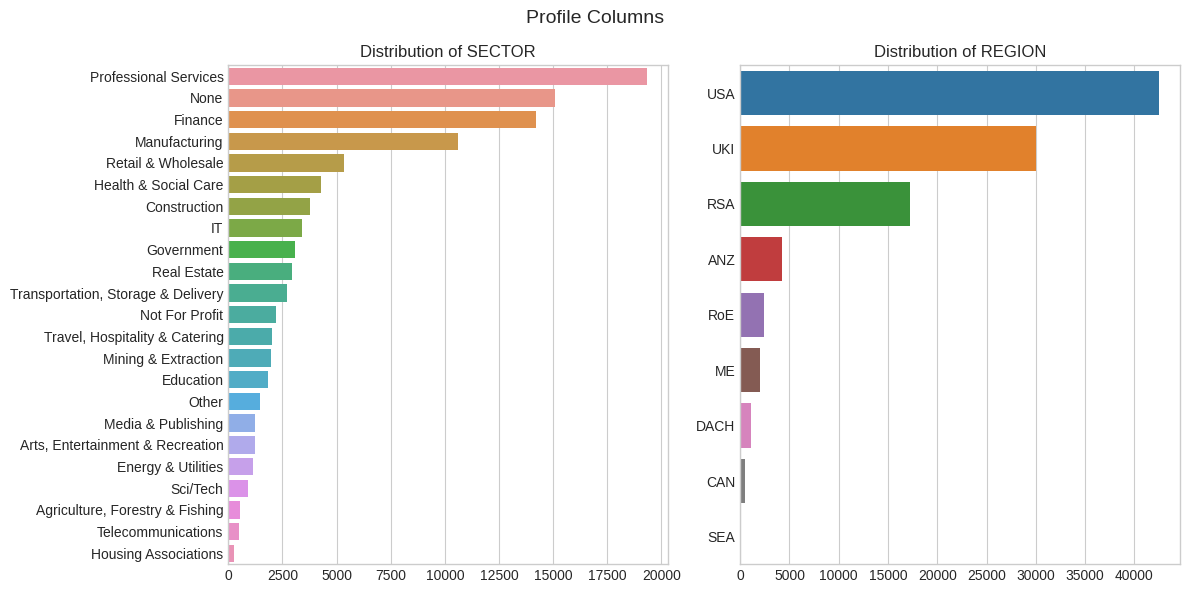

In [103]:
plot_categorical_columns(df, list(set(cat_cols) & set(profile_cols)), 2, "Profile Columns", (12,6))

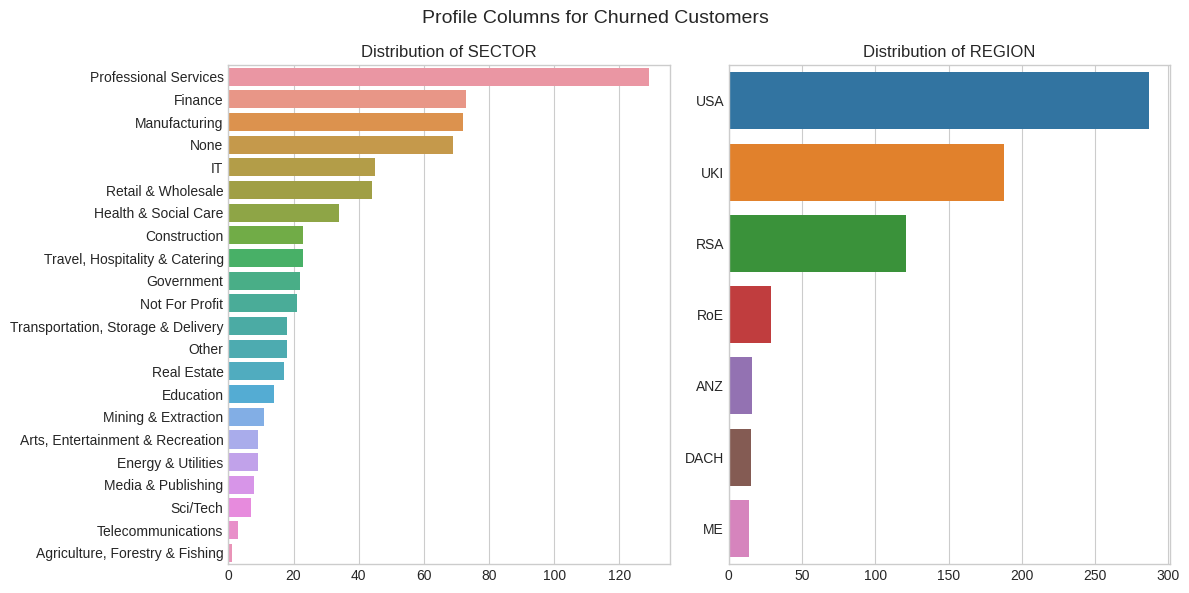

In [104]:
plot_categorical_columns(df[df[target_col] == 1], list(set(cat_cols) & set(profile_cols)), 2, "Profile Columns for Churned Customers", (12,6))

- The customers operate on a wide range of sectors and regions. This variability in sectors suggests that the churn model will need to account for diverse business practices and customer needs.
- Most of the customers are in the professional services sector basewd in USA and UKI regions
- The distribution of customers churned region and sector-wise remains similar to the distribution of the regions and sectors themselves

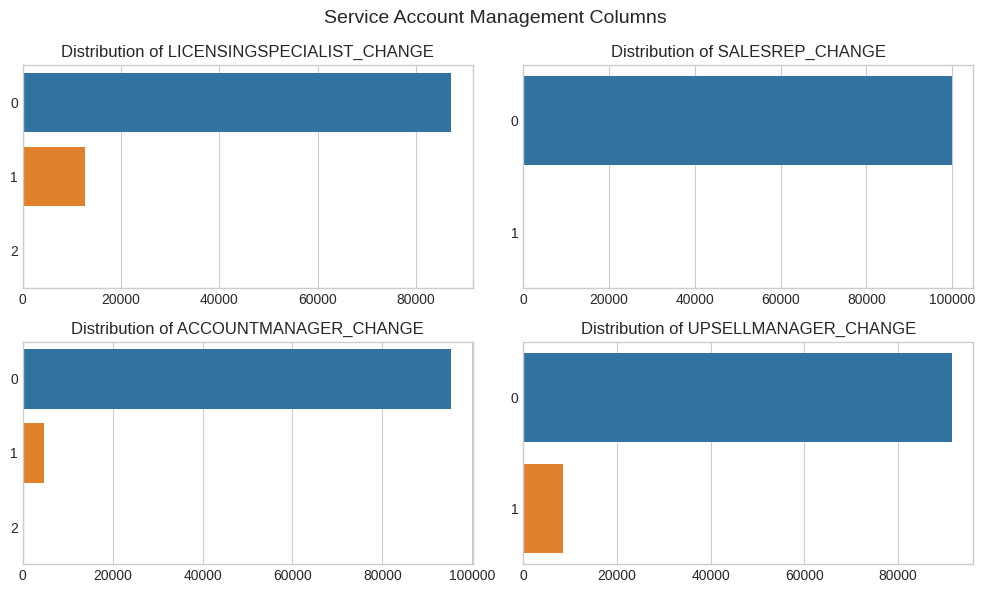

In [105]:
plot_categorical_columns(df, list(set(cat_cols) & set(service_account_mgmt_cols)), 2, "Service Account Management Columns", (10,6))

Majority of customers experience zero changes in their account management team.

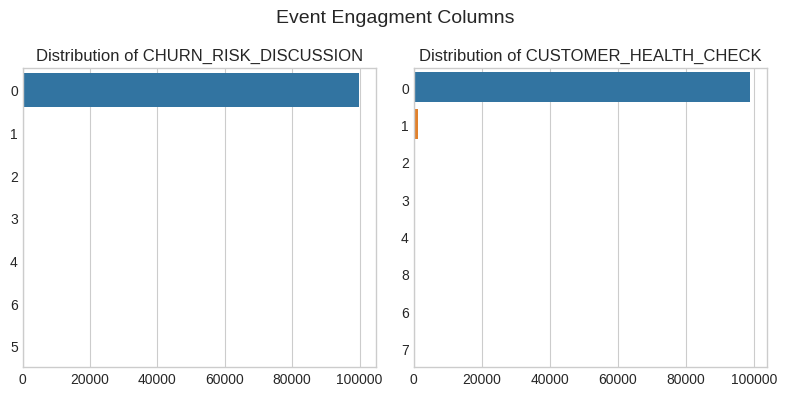

In [106]:
plot_categorical_columns(df, list(set(cat_cols) & set(events_engagements_cols)), 2, "Event Engagment Columns", (8,4))

- The customer health check bar chart shows that almost all customers have not attended a health check (value 0)
- The chart also indicates that discussions about churn risk are infrequent among customers.

These insights may point to an area of opportunity where increasing these engagements could potentially help in identifying and reducing churn risk.

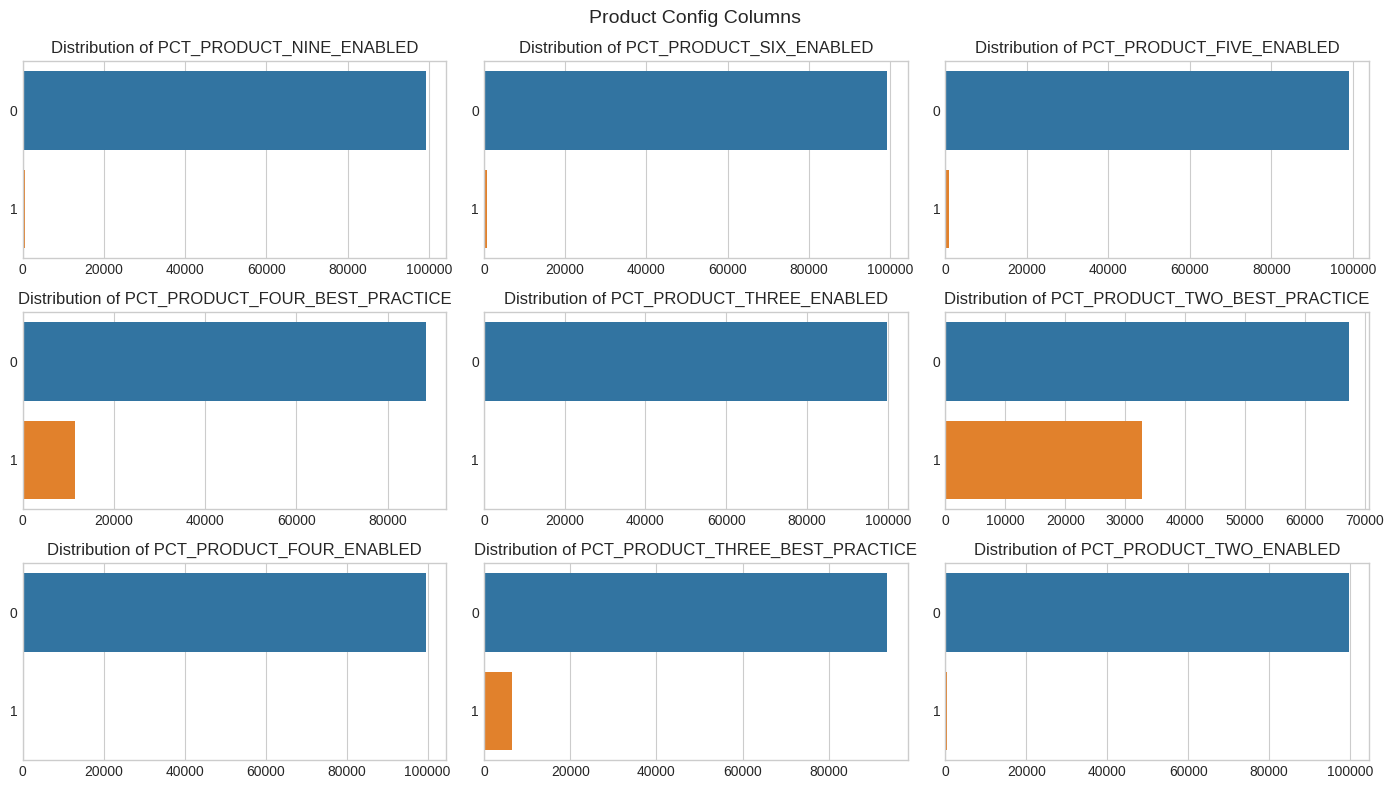

In [107]:
plot_categorical_columns(df, list(set(cat_cols) & set(product_config_cols)), 3, "Product Config Columns", (14,8))

- There is a notable proportion of customers with the best practice settings enabled for Product 2, 3 and 4.
- These charts show that many features are not enabled across multiple products, which may suggest a lack of usage or awareness of the available features. We could infer that customers might not be fully utilizing the products, which could lead to dissatisfaction and churn.

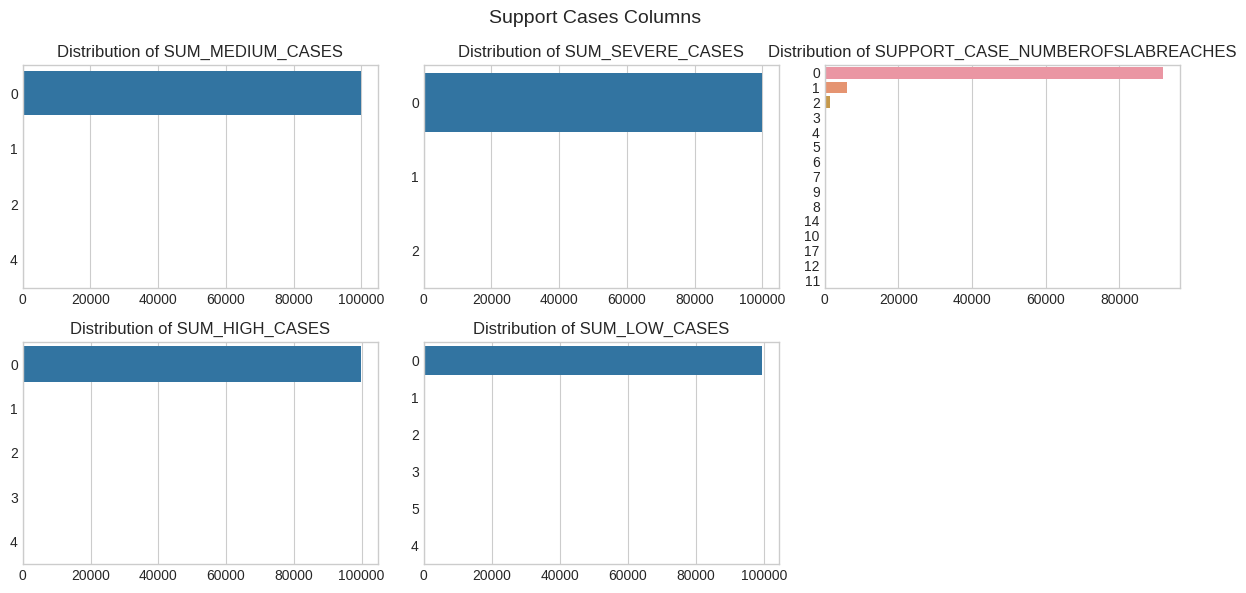

In [108]:
plot_categorical_columns(df, list(set(cat_cols) & set(support_cases_cols)), 3, "Support Cases Columns", (12,6))

It seems that customers rarely involve severe issues or SLA breaches, which could imply a well-functioning support system.

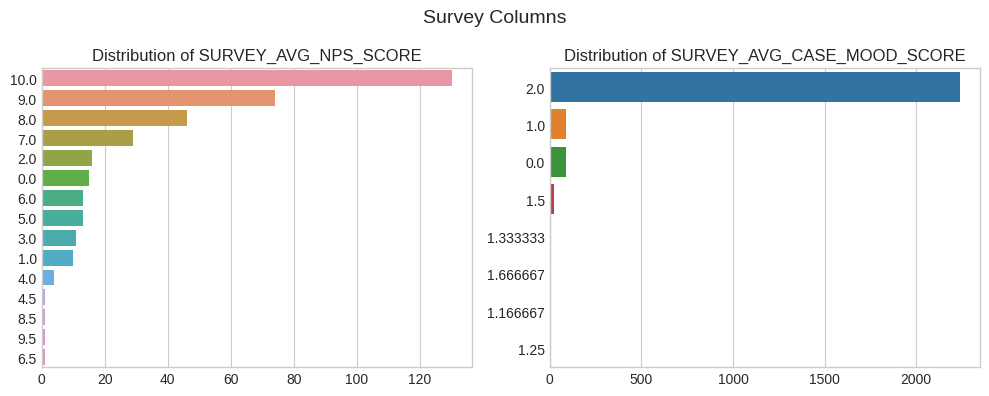

In [109]:
plot_categorical_columns(df, list(set(cat_cols) & set(survey_cols)), 2, "Survey Columns", (10,4))

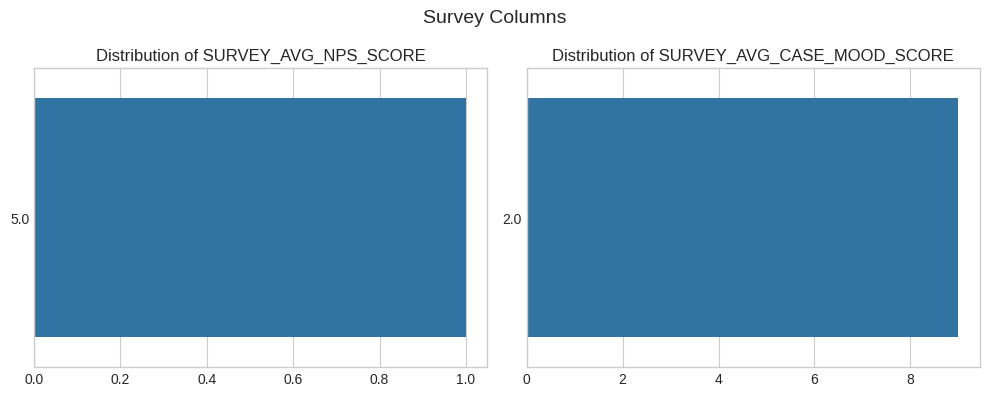

In [110]:
plot_categorical_columns(df[df[target_col] == 1], list(set(cat_cols) & set(survey_cols)), 2, "Survey Columns", (10,4))

These columns have a very high percentage of null values so we've to be careful while making any inference. However, we can notice that the churn cases consist of customers who have rated 5 and have an avaerage case mood score of 2. In ideal cases however, low mood scores in support cases could be a significant indicator of churn risk.



#### Numeric and Categorical Feature Engineering

In [113]:
df[['PRODUCT_ONE','PRODUCT_TWO']]

,PRODUCT_ONE,PRODUCT_TWO
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
99995,1,1
99996,1,1
99997,1,1
99998,1,1


In [114]:
## Aggregations and Interactions
df['CLV'] = df['ARR'] * df['TENURE_MONTHS']
df['TOTAL_PRODUCTS'] = df[[f'PRODUCT_{i}' for i in ['ONE','TWO','THREE','FOUR','FIVE','SIX','SEVEN','EIGHT','NINE','TEN','ELEVEN',
                             'TWELVE','THIRTEEN','FOURTEEN','FIFTEEN','SIXTEEN','SEVENTEEN','EIGHTEEN','NINETEEN',
                             'TWENTY','TWENTYONE','TWENTYTWO','TWENTYTHREE']]].sum(axis=1)
df['engagement_interaction'] = df['CS_EVENT_ATTENDED'] * df['CUSTOMER_HEALTH_CHECK']

In [115]:
## Performing one hot encoding on categorical columns
def onehotencode_and_concat(df, encode_feats):
    dummies = pd.get_dummies(df[[encode_feats]])
    res = pd.concat([df, dummies], axis=1)
    res = res.drop(encode_feats, axis=1)
    return(res)

df = onehotencode_and_concat(df, 'REGION')
df = onehotencode_and_concat(df, 'SECTOR')

Atleast 1/3rd of data in these below columns are null, so it is best to drop them, we might think of other approaches if the model underperforms


In [116]:
drop_cols = ["DNB_GLOBAL_SALES_REVENUE", "DNB_GLOBAL_EMPLOYEE_COUNT","SURVEY_AVG_CXI_SCORE", "SURVEY_AVG_NPS_SCORE", "SURVEY_AVG_CASE_MOOD_SCORE"]
df = df.drop(drop_cols, axis=1)

Performing hash encoding on the account id column as it has a very high cardinality. I'm not dropping the column as multiple records correspond to each account and account-wise information might be cruicial for the model to predict customer churn.
Hash Encoding allows the encoding of variable with high cardinality into fixed number of dimensions and hence not increasing the dimensionality exponentially, preventing the 'curse of dimensionality'.

In [117]:
hash_enc = ce.HashingEncoder(cols=['SALESFORCEACCOUNTID'], n_components=8)
df_encoded = hash_enc.fit_transform(df['SALESFORCEACCOUNTID'])
df = df.drop('SALESFORCEACCOUNTID', axis=1)
df = pd.concat([df, df_encoded], axis=1)

### Bivariate Analysis

For bivariate analysis, I'm using a method known as Predictive Power Score (PPS) instead of traditional correlation metrics. This is because while Pearson's correlation works well for linear relationships between variables, PPS can be capture non-linear and asymmetric Relationships and can work with categorical and mixed-type data as well.
This is an overall better indicator to illustrate the predictive power of varialbles amongst themselves and with the target variable, i.e. CHURN.

In [118]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

Due to high dimensionality, the overal matrix was appearing very congested and readability was compromised. I filtered the heatmap based on the threshold instead to visualize the correlations better.

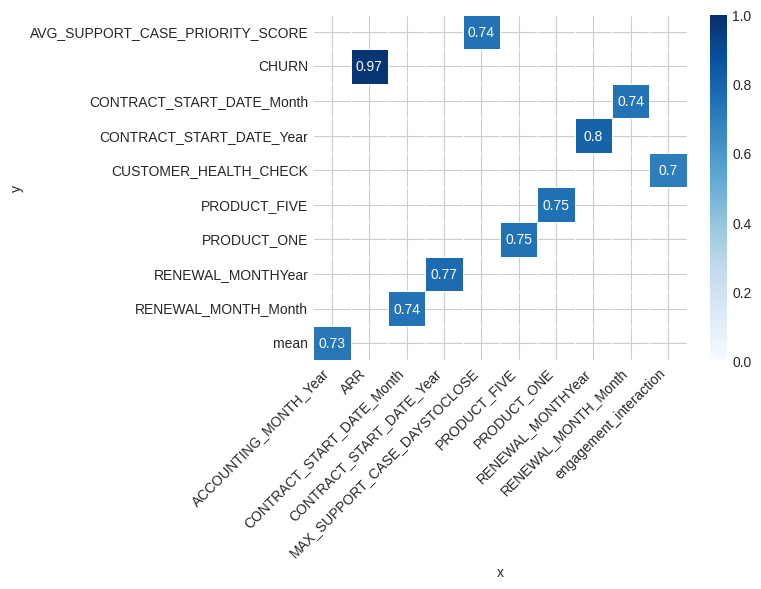

In [119]:
# Set the threshold
threshold = 0.7

# Create a mask for values that are above the threshold but less than 1
mask = (matrix_df >= threshold) & (matrix_df < 1)
filtered_matrix = matrix_df[mask]
filtered_matrix = filtered_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Plot the heatmap with the filtered matrix
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The heatmap visualizes the Predictive Power Scores between various features and the target column - `CHURN`.

- We can see that features with a PPS value close to 1 is the column `ARR` (Annual Recurring Revenue) which highly predictive of churn. This feature can help the model significantly in predicting customer churn. We can essentially infer that customers which yield low revenue are more likely to churn.

- The time-related features extracted from `CONTRACT_START_DATE` and `RENEWAL_MONTH` also show a notable predictive relationship, however since the correlation is not exorbitantly high, I chose to keep the features as is.

These insights can be valuable in understanding which features play an important role in predicting customer churn and help us prioritize which features to focus on for model development and business strategies aimed at reducing churn.

In [120]:
## Writing processed dataset into disk
df.to_csv("/content/drive/MyDrive/quantspark/datasets/proc_dataset.csv", index=False)